# Estudo Dirigido 8

### Aluno: Daniel da Rocha Carneiro

---

#### Importações

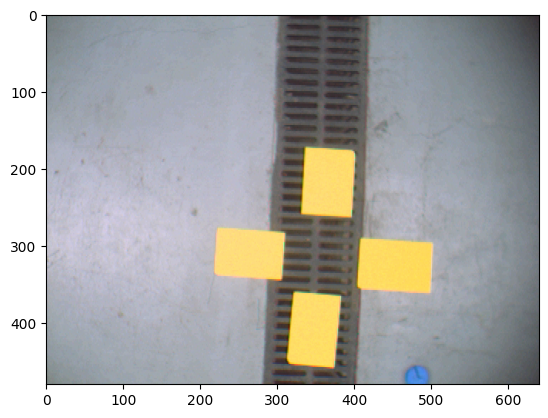

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from sklearn.cluster import KMeans

img = cv.imread("yellowtargets.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

In [2]:
targets = img.copy().reshape(-1, 3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(targets)

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Daniel\AppData\Local\Pro

In [4]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
center2 = targets.copy()
for i in range(len(targets)):
    targets[i] = centers[labels[i]]
    center2[i] = 0 if labels[i] != 2 else centers[labels[i]]

targets = targets.reshape(img.shape)
center2 = center2.reshape(img.shape)

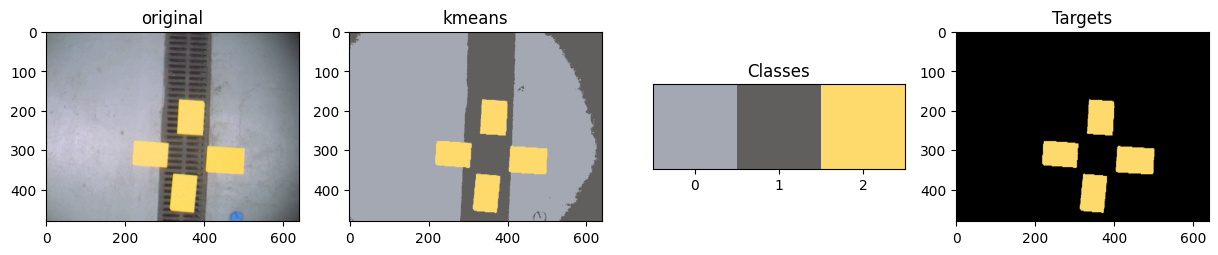

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(img)
axs[0].set_title("original")
axs[1].imshow(targets)
axs[1].set_title("kmeans")
axs[2].imshow(centers.reshape(1, 3, 3) / 255)
axs[2].set_xticks([0,1,2])
axs[2].set_yticks([])
axs[2].set_title("Classes")
axs[3].imshow(center2)
axs[3].set_title("Targets")
plt.grid(False)
fig.savefig("yellowtargets_kmeans.png", pad_inches=0, facecolor="white")

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\colour\utilities\verbose.py:262: ColourUsageWarning: The "ALEXA Wide Gamut" RGB colourspace has been renamed to "ARRI Wide Gamut 3" for consistency with ARRI's new naming convention.
  warn(*args, **kwargs)  # noqa: B028
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\colour\utilities\verbose.py:262: ColourUsageWarning: The "CIE 2012 2 Degree Standard Observer" has been renamed to "CIE 2015 2 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)  # noqa: B028
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\colour\utilities\verbose.py:262: ColourUsageWarning: The "CIE 2012 10 Degree Standard Observer" has been renamed to "CIE 2015 10 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)  # noqa: B028


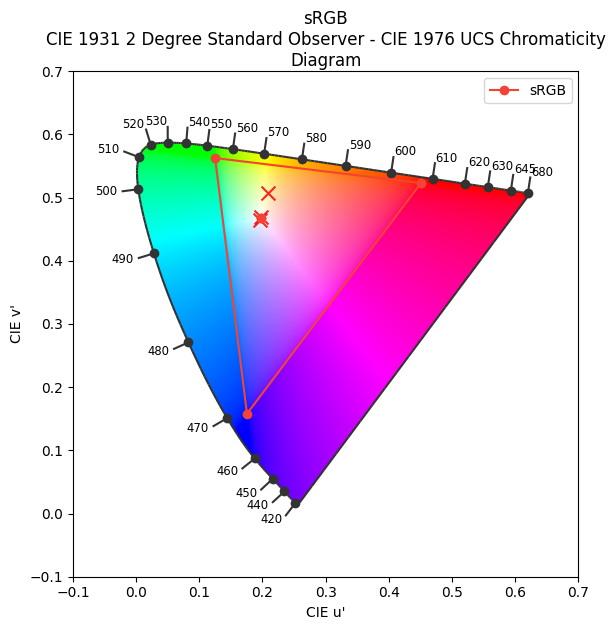

In [6]:
from colour.plotting import *

fig, axs = plot_RGB_chromaticities_in_chromaticity_diagram_CIE1976UCS(centers, scatter_kwargs={"s": 100, "c": "red", "marker": "x"})
fig.savefig("chromaticity_diagram.png", facecolor="white")